# <center>Animated Scatterplot</center>

##### <center>An epic data visualization / storytelling similar to [Hans Rosling’s famous animation](https://www.youtube.com/watch?v=jbkSRLYSojo&feature=youtu.be)</center>

    - Read in data from multiple sources: 
        - worldwide fertility rate data
        - worldwide life expectancy data
        - worldwide population data
        
    - Merge all the data into a single DataFrame.
    - Generate a scatterplot for a single year.
    - Combine images of scatterplots of all years to make an animation / gif.

In [2]:
import pandas as pd

In [3]:
fert = pd.read_csv('./raw data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('./raw data/gapminder_lifeexpectancy.xlsx', index_col=0)

In [4]:
print(fert.shape)
print(life.shape)

(260, 216)
(260, 217)


In [5]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [6]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [7]:
fert.columns = fert.columns.astype(int)

In [8]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [9]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [10]:
fert.index.name = 'country'

In [11]:
fert = fert.reset_index()

In [12]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [13]:
life.index
life.index.name = 'country'
life = life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [14]:
pop = pd.read_excel('./raw data/gapminder_population.xlsx', index_col=0)
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [15]:
pop.index.name = 'country'
pop = pop.reset_index()
pop = pop.melt(id_vars='country', var_name='year', value_name='total_population')

In [16]:
df = fert.merge(pop)
df = df.merge(life)

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [18]:
sns.set_theme(style="white")

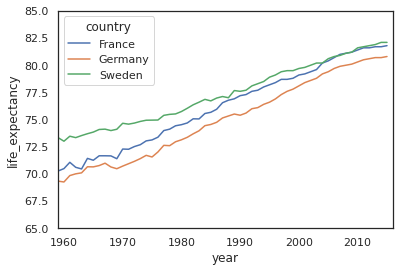

In [19]:
df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])] 
plt.axis((1959, 2016, 65, 85))
sns.lineplot(x='year', y='life_expectancy', hue='country', data=df_subset);

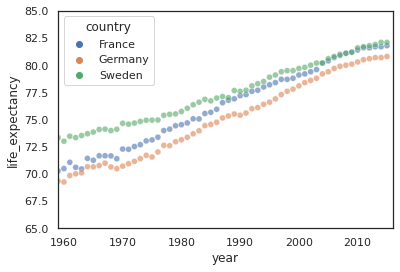

In [20]:
plt.axis((1959, 2016, 65, 85))
sns.scatterplot(x='year', y='life_expectancy', hue='country', data=df_subset, alpha=0.6);

In [21]:
import pycountry_convert as pc
import numpy as np

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'NaN'
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'NaN'
    return (cn_continent)

continent = []
for country in df['country']:
    item = get_continent(country)
    continent.append(item)

df['continent']=continent
df['continent']=df['continent'].replace('AS','Asia').replace('EU','Europe').replace('AF','Africa').replace('OC','Oceania').replace('NA','North America').replace('SA','South America').replace('NaN','Other')

In [22]:
import numpy as np

xmin=df['life_expectancy'].min()
xmax=df['life_expectancy'].max()
ymin=df['fertility_rate'].min()
ymax=df['fertility_rate'].max()

for year in range(1960,2016,1):
    df_subset = df.loc[df['year'].isin([year])]
    path = "./lifeexp/"
    plot = sns.scatterplot(x='life_expectancy', y='fertility_rate', data=df_subset, alpha=1).get_figure()
    plt.axis((xmin,xmax,ymin,ymax))
    plot.savefig(path + "lifeexp_" + str(year) + ".png")
    plot.clf()

<Figure size 432x288 with 0 Axes>

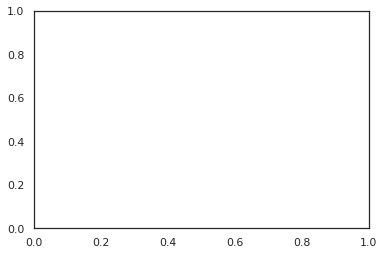

In [28]:
fig, ax = plt.subplots()

for year in range(1960,2016,1):
    df_subset = df.loc[df['year'].isin([year])]
    path = "./lifeexp_popadj/"
    
    plot = sns.scatterplot(x="life_expectancy", y="fertility_rate", hue="continent", 
            size=df['total_population'], sizes=(40, 400), alpha=0.6, palette="muted", 
             legend='auto', ax=ax, data=df_subset).get_figure()
    
    handle, label = ax.get_legend_handles_labels()
    label_edit = [i.replace('continent','Continent').replace('total_population','Population [Billion]') for i in label]

    handle.insert(8,handle[0])
    label_edit.insert(8," ")

    legend=ax.legend(handle, label_edit, bbox_to_anchor=(1,1),loc=2)
    
    ax.set_xlabel('Life expectancy', fontsize = 12)
    ax.set_ylabel('Fertility rate', fontsize = 12)
    ax.set_title('Life Expectancy - Fertility Rate Correlation in ' + str(year), x=0.5, y=1.05, fontsize = 16)
    plt.axis((xmin,xmax,ymin,ymax))
    
    plot.savefig(path + "lifeexp_" + str(year) + ".png", bbox_extra_artists=(legend,), bbox_inches='tight');
    ax.cla()

In [29]:
import imageio

images = []

for year in range(1960, 2016, 1):
    filename = './lifeexp_popadj/lifeexp_{}.png'.format(year)
    images.append(imageio.imread(filename))

imageio.mimsave('Animated Scatterplot_10fps_output.gif', images, fps=10)